# Waveform Basics with NumPy

This notebook covers the fundamentals of generating and visualizing waveforms using NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

try:
    from ipywidgets import interact, FloatSlider, IntSlider, Dropdown
    WIDGETS_AVAILABLE = True
except ImportError:
    WIDGETS_AVAILABLE = False
    print("ipywidgets not available. Install with: pip install ipywidgets")

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)

## 1. Basic Sine Wave Generation

A sine wave is defined by:
$$y(t) = A \sin(2\pi f t + \phi)$$

Where:
- $A$ = amplitude
- $f$ = frequency (Hz)
- $t$ = time
- $\phi$ = phase (radians)

In [2]:
def generate_sine_wave(frequency, amplitude=1.0, phase=0.0, duration=1.0, sample_rate=1000):
    """Generate a sine wave with specified parameters."""
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return t, y

def generate_cosine_wave(frequency, amplitude=1.0, phase=0.0, duration=1.0, sample_rate=1000):
    """Generate a cosine wave with specified parameters."""
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = amplitude * np.cos(2 * np.pi * frequency * t + phase)
    return t, y

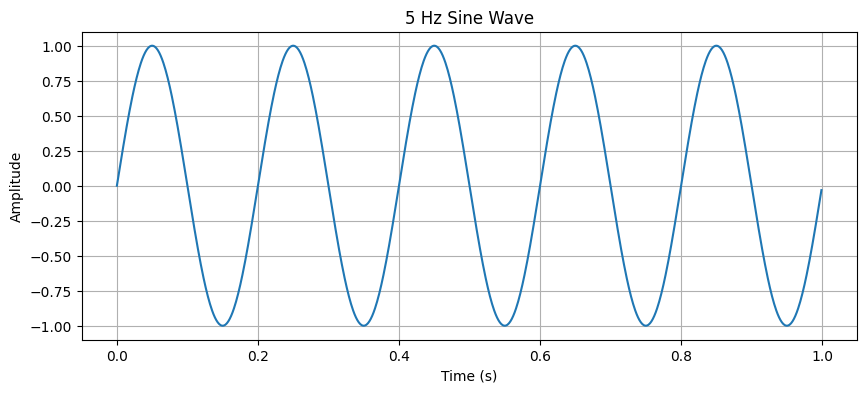

In [3]:
# Generate a 5 Hz sine wave
t, y = generate_sine_wave(frequency=5, amplitude=1.0, duration=1.0)

plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('5 Hz Sine Wave')
plt.grid(True)
plt.show()

## 2. Interactive Sine Wave Explorer

Use the sliders below to explore how frequency, amplitude, and phase affect the waveform.

In [4]:
def plot_interactive_sine(frequency=5.0, amplitude=1.0, phase=0.0):
    """Plot a sine wave with interactive parameters."""
    t, y = generate_sine_wave(frequency=frequency, amplitude=amplitude, 
                               phase=phase, duration=2.0)
    
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(t, y, 'b-', linewidth=2)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Sine Wave: f={frequency:.1f} Hz, A={amplitude:.1f}, φ={phase:.2f} rad ({np.degrees(phase):.0f}°)')
    ax.set_ylim(-2.5, 2.5)
    ax.grid(True)
    plt.show()

if WIDGETS_AVAILABLE:
    interact(
        plot_interactive_sine,
        frequency=FloatSlider(min=1, max=20, step=0.5, value=5, description='Frequency (Hz)'),
        amplitude=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Amplitude'),
        phase=FloatSlider(min=0, max=2*np.pi, step=0.1, value=0, description='Phase (rad)')
    )
else:
    plot_interactive_sine()

interactive(children=(FloatSlider(value=5.0, description='Frequency (Hz)', max=20.0, min=1.0, step=0.5), Float…

## 3. Phase Relationship: Sine vs Cosine

Sine and cosine are related by a phase shift of $\frac{\pi}{2}$ radians (90°):
$$\cos(\theta) = \sin(\theta + \frac{\pi}{2})$$

In [5]:
def plot_sine_cosine_comparison(frequency=3.0, phase_shift=0.0):
    """Compare sine and cosine with adjustable phase."""
    t = np.linspace(0, 2, 1000, endpoint=False)
    
    sine_wave = np.sin(2 * np.pi * frequency * t)
    cosine_wave = np.cos(2 * np.pi * frequency * t)
    sine_shifted = np.sin(2 * np.pi * frequency * t + phase_shift)
    
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(t, sine_wave, 'b-', linewidth=2, label='sin(2πft)')
    ax.plot(t, cosine_wave, 'r--', linewidth=2, label='cos(2πft)')
    ax.plot(t, sine_shifted, 'g:', linewidth=2, label=f'sin(2πft + {phase_shift:.2f})')
    
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Sine vs Cosine at {frequency:.1f} Hz (Phase shift: {phase_shift:.2f} rad = {np.degrees(phase_shift):.0f}°)')
    ax.legend(loc='upper right')
    ax.grid(True)
    ax.set_ylim(-1.5, 1.5)
    plt.show()
    
    if abs(phase_shift - np.pi/2) < 0.1:
        print("At φ = π/2, the shifted sine matches the cosine!")

if WIDGETS_AVAILABLE:
    interact(
        plot_sine_cosine_comparison,
        frequency=FloatSlider(min=1, max=10, step=0.5, value=3, description='Frequency (Hz)'),
        phase_shift=FloatSlider(min=0, max=2*np.pi, step=0.1, value=0, description='Phase shift')
    )
else:
    plot_sine_cosine_comparison()

interactive(children=(FloatSlider(value=3.0, description='Frequency (Hz)', max=10.0, min=1.0, step=0.5), Float…

## 4. Wave Superposition

When waves combine, they add together (superposition principle). This creates complex waveforms from simple components.

In [6]:
def plot_superposition(freq1=5, amp1=1.0, freq2=12, amp2=0.5):
    """Demonstrate wave superposition with two frequencies."""
    duration = 1.0
    sample_rate = 1000
    
    t, wave1 = generate_sine_wave(frequency=freq1, amplitude=amp1, 
                                   duration=duration, sample_rate=sample_rate)
    _, wave2 = generate_sine_wave(frequency=freq2, amplitude=amp2, 
                                   duration=duration, sample_rate=sample_rate)
    combined = wave1 + wave2
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))
    
    axes[0].plot(t, wave1, 'b-')
    axes[0].set_title(f'Wave 1: {freq1} Hz, Amplitude = {amp1}')
    axes[0].set_ylabel('Amplitude')
    axes[0].set_ylim(-2.5, 2.5)
    axes[0].grid(True)
    
    axes[1].plot(t, wave2, 'orange')
    axes[1].set_title(f'Wave 2: {freq2} Hz, Amplitude = {amp2}')
    axes[1].set_ylabel('Amplitude')
    axes[1].set_ylim(-2.5, 2.5)
    axes[1].grid(True)
    
    axes[2].plot(t, combined, 'g-')
    axes[2].set_title(f'Combined Signal (Wave 1 + Wave 2)')
    axes[2].set_xlabel('Time (s)')
    axes[2].set_ylabel('Amplitude')
    axes[2].set_ylim(-2.5, 2.5)
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()

if WIDGETS_AVAILABLE:
    interact(
        plot_superposition,
        freq1=IntSlider(min=1, max=20, value=5, description='Freq 1 (Hz)'),
        amp1=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Amp 1'),
        freq2=IntSlider(min=1, max=30, value=12, description='Freq 2 (Hz)'),
        amp2=FloatSlider(min=0.1, max=2.0, step=0.1, value=0.5, description='Amp 2')
    )
else:
    plot_superposition()

interactive(children=(IntSlider(value=5, description='Freq 1 (Hz)', max=20, min=1), FloatSlider(value=1.0, des…

## 5. Constructing a Square Wave (Fourier Series)

Many signals can be built from sine wave components. Here we create a square wave approximation using the Fourier series.

In [7]:
def plot_square_wave_fourier(fundamental_freq=2, n_harmonics=5):
    """Approximate a square wave using Fourier series.
    
    Square wave = (4/π) * Σ sin((2k-1)ωt)/(2k-1) for k = 1, 2, 3, ...
    """
    duration = 1.0
    sample_rate = 1000
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = np.zeros_like(t)
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 7))
    
    # Plot individual harmonics
    for k in range(1, n_harmonics + 1):
        n = 2 * k - 1  # Odd harmonics only
        harmonic = (4 / np.pi) * np.sin(2 * np.pi * n * fundamental_freq * t) / n
        y += harmonic
        if k <= 5:  # Only show first 5 harmonics individually
            axes[0].plot(t, harmonic, alpha=0.7, label=f'{n}f (n={n})')
    
    axes[0].set_title('Individual Harmonic Components')
    axes[0].set_ylabel('Amplitude')
    axes[0].legend(loc='upper right')
    axes[0].grid(True)
    axes[0].set_ylim(-1.5, 1.5)
    
    # Plot combined result
    axes[1].plot(t, y, 'b-', linewidth=2)
    axes[1].axhline(y=1, color='r', linestyle='--', alpha=0.5)
    axes[1].axhline(y=-1, color='r', linestyle='--', alpha=0.5)
    axes[1].set_title(f'Square Wave Approximation ({n_harmonics} harmonics)')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Amplitude')
    axes[1].grid(True)
    axes[1].set_ylim(-1.5, 1.5)
    
    plt.tight_layout()
    plt.show()

if WIDGETS_AVAILABLE:
    interact(
        plot_square_wave_fourier,
        fundamental_freq=IntSlider(min=1, max=5, value=2, description='Base Freq (Hz)'),
        n_harmonics=IntSlider(min=1, max=50, value=5, description='# Harmonics')
    )
else:
    plot_square_wave_fourier()

interactive(children=(IntSlider(value=2, description='Base Freq (Hz)', max=5, min=1), IntSlider(value=5, descr…

## 6. Beats: Interference of Close Frequencies

When two waves with similar frequencies combine, they create a "beating" effect.

In [8]:
def plot_beats(f1=10, f2=11):
    """Demonstrate beat frequency phenomenon."""
    duration = 3.0
    sample_rate = 1000
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    wave1 = np.sin(2 * np.pi * f1 * t)
    wave2 = np.sin(2 * np.pi * f2 * t)
    beats = wave1 + wave2
    
    # Envelope of the beat frequency
    beat_freq = abs(f2 - f1)
    envelope = 2 * np.cos(2 * np.pi * beat_freq / 2 * t)
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 8))
    
    axes[0].plot(t, wave1, 'b-', alpha=0.7)
    axes[0].set_title(f'Wave 1: {f1} Hz')
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True)
    axes[0].set_ylim(-1.5, 1.5)
    
    axes[1].plot(t, wave2, 'orange', alpha=0.7)
    axes[1].set_title(f'Wave 2: {f2} Hz')
    axes[1].set_ylabel('Amplitude')
    axes[1].grid(True)
    axes[1].set_ylim(-1.5, 1.5)
    
    axes[2].plot(t, beats, 'g-', alpha=0.8, label='Combined signal')
    axes[2].plot(t, envelope, 'r--', linewidth=2, label=f'Envelope ({beat_freq} Hz beat)')
    axes[2].plot(t, -envelope, 'r--', linewidth=2)
    axes[2].set_title(f'Beats: {f1} Hz + {f2} Hz = {beat_freq} Hz beat frequency')
    axes[2].set_xlabel('Time (s)')
    axes[2].set_ylabel('Amplitude')
    axes[2].legend(loc='upper right')
    axes[2].grid(True)
    axes[2].set_ylim(-2.5, 2.5)
    
    plt.tight_layout()
    plt.show()

if WIDGETS_AVAILABLE:
    interact(
        plot_beats,
        f1=IntSlider(min=5, max=20, value=10, description='Freq 1 (Hz)'),
        f2=IntSlider(min=5, max=25, value=11, description='Freq 2 (Hz)')
    )
else:
    plot_beats()

interactive(children=(IntSlider(value=10, description='Freq 1 (Hz)', max=20, min=5), IntSlider(value=11, descr…

## Summary

In this notebook, we covered:
- Generating sine and cosine waves with NumPy
- Controlling frequency, amplitude, and phase
- The 90° phase relationship between sine and cosine
- Wave superposition and combining multiple frequencies
- Building complex waveforms from simple components
- Beat frequencies from interfering waves

Next, in **02_fft_analysis.ipynb**, we'll explore how to decompose signals into their frequency components using the Fast Fourier Transform.